# Recherches de Vinciane : accidents et compteurs

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
#Pour faire une carte interactive, il faut installer le module "folium" sur son PC
import folium

A titre informatif : les départements d'idf
Paris (75)
Seine-et-Marne (77)
Yvelines (78)
Essonne (91)
Hauts-de-Seine (92)
Seine-Saint-Denis (93)
Val-de-Marne (94)
Val-d'Oise (95)

## Des données sur les communes

In [4]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()

#Méthodes utilisées dans le TP de géopandas
def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
  with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

download_unzip('https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12')
communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")

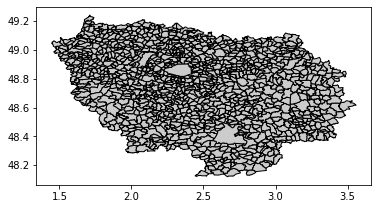

In [5]:
#On indexe par rapport au numéro des départements et on ne garde que les départements d'ile de France qui nous intéressent
data_borders = communes_borders.set_index('insee')
data_borders['dep'] = data_borders.index.str[:2]
communes_idf = data_borders.loc[data_borders['dep'].isin(['75','77', '78', '91','92','93','94', '95'])]
communes_idf.plot(color='0.8', edgecolor='black')

## Les données sur les accidents de vélo

Le site d'où sont tirées les données : https://www.data.gouv.fr/fr/datasets/accidents-de-velo/

In [6]:
accident_velo = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3d5f2317-5afd-4a9f-a9c5-bd4fe0113f39')
#accident_velo

C:\Users\Vinciane\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
accident_velo_idf = accident_velo[accident_velo['departement'].isin(['75','77','78','91','92','93','94','95'])]
# accident_velo_idf
# Il y a un problème avec les latitudes et les longitudes nulles et les quelques erreurs

Pour les valeurs des longitudes et latitudes, j'ai cherché sur maps les latitudes et longitudes max d'ile de France.. 
On obtient

longitude min = 1,44 longitude max = 3,57
latitude min = 48.12 , latitude max= 49.2

In [8]:
#On transforme les coordonnées latitudes/longitudes en coordonnées lisibles par géopandas
#utilisation du tutos sur : https://geopandas.org/gallery/create_geopandas_from_pandas.html
gdf = gpd.GeoDataFrame(accident_velo_idf, geometry=gpd.points_from_xy(accident_velo_idf.lon, accident_velo_idf.lat))
#print (gdf.head)
gdf = gdf.cx[1.44:3.57,48.12:49.2]
gdf
#On remarque qu'il nous reste 4000 données, ce qui est représentatif des 18 000 données A PROUVER

,identifiant accident,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,...,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules,geometry
61,200500001930,2005-01-15,01 - janvier,5 - samedi,15.0,95,95042,49.06400,2.32800,non,...,NaN,NaN,NaN,Arrière,Sans changement de direction,200500001930B02,Cyclomoteur <50cm3,"Même sens, même file",1.0,POINT (2.32800 49.06400)
1142,200500024289,2005-04-10,04 - avril,6 - dimanche,9.0,78,78497,48.69700,1.77100,non,...,NaN,NaN,Véhicule,Avant,Déporté à gauche,200500024289A01,NaN,NaN,NaN,POINT (1.77100 48.69700)
1143,200500024300,2005-04-24,04 - avril,6 - dimanche,18.0,78,78062,48.85000,1.89000,oui,...,Oui,NaN,Véhicule,Avant,Sans changement de direction,200500024300B02,VL seul,Tournant à gauche,1.0,POINT (1.89000 48.85000)
1149,200500024520,2005-04-03,04 - avril,6 - dimanche,12.0,91,91105,48.57500,2.16600,oui,...,Oui,NaN,NaN,NaN,"Même sens, même file",200500024520B02,VL seul,"Même sens, même file",1.0,POINT (2.16600 48.57500)
1152,200500024639,2005-04-05,04 - avril,1 - mardi,11.0,78,78143,48.73000,2.10000,oui,...,NaN,NaN,Véhicule,Avant droit,Sans changement de direction,200500024639B02,VL seul,Traversant la chaussée,1.0,POINT (2.10000 48.73000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,201800050291,2018-07-10,07 - juillet,1 - mardi,9.0,75,75101,48.86400,2.33134,oui,...,Non,Autre obstacle fixe sur chaussée,Véhicule,Avant droit,Sans changement de direction,201800050291B01,VL seul,Ouverture de porte,1.0,POINT (2.33134 48.86400)
65532,201800050337,2018-11-17,11 - novembre,5 - samedi,12.0,75,75101,48.85854,2.34825,oui,...,Non déterminable,NaN,Véhicule,Côté gauche,Sans changement de direction,201800050337A01,Motocyclette > 125 cm3,Sans changement de direction,1.0,POINT (2.34825 48.85854)
65533,201800050355,2018-02-01,02 - février,3 - jeudi,15.0,75,75102,48.86870,2.34133,oui,...,Oui,NaN,Véhicule,Avant,"Dans le couloir bus, dans le même sens",201800050355B01,VL seul,Tournant a droite,1.0,POINT (2.34133 48.86870)
65534,201800050359,2018-02-12,02 - février,0 - lundi,9.0,75,75101,48.86470,2.34275,oui,...,Oui,NaN,Véhicule,Avant gauche,Traversant la chaussée,201800050359B01,Motocyclette > 50 cm3 et <= 125 cm3,Dépassant à gauche,1.0,POINT (2.34275 48.86470)


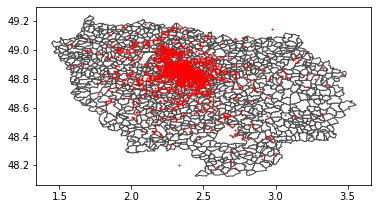

In [9]:
#Première carte, pas ouf
fig, ax = plt.subplots()
communes_idf.plot(ax=ax, color='white', edgecolor='0.3')
gdf.plot(ax=ax, color='red', markersize=1)
plt.show()

Si on essaye de passer par géopandas
accident_velo2 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/edef9d7e-d574-4203-b4ce-40328edb8298')

## Faire une carte interactive sur les accidents

In [1]:
#Premières cartes interactive avec les accidents
map_accident = folium.Map(location = [48.85, 2.34], zoom_start=12)
feature_group = folium.FeatureGroup("Locations")
lat = gdf.lat
lng = gdf.lon
for lat, lng in zip(lat, lng):
    feature_group.add_child(folium.Marker(location=[lat,lng]))

map_accident.add_child(feature_group)


NameError: name 'folium' is not defined

## Les données sur les compteurs en Ile de France

le fichier à télécharger est ici : https://velo.smartidf.services/donnees, dans comptage vélo - Données compteurs 

In [13]:
am_temporaires = gpd.read_file('D:/Données/ENSAE/2A/Python/amenagements-velo-temporaires-en-ile-de-france.geojson')
am_temporaires

,highway,ad,nv,ag,geometry
0,primary,bande uni,None,None,"LINESTRING (2.31015 48.89828, 2.30998 48.89878..."
1,primary,bande uni,None,None,"LINESTRING (2.45466 48.90704, 2.45511 48.90692..."
2,primary,bande uni,None,None,"LINESTRING (2.46184 48.90629, 2.46091 48.90651..."
3,primary,bande uni,None,None,"LINESTRING (2.43624 48.91305, 2.43611 48.91312..."
4,primary,bande uni,None,None,"LINESTRING (2.42081 48.93008, 2.42173 48.93094..."
...,...,...,...,...,...
1645,primary,bande uni,None,None,"LINESTRING (2.40344 48.91403, 2.40355 48.91413..."
1646,primary,bande uni,None,None,"LINESTRING (2.40610 48.91650, 2.40616 48.91655..."
1647,primary,bande uni,None,None,"LINESTRING (2.41815 48.92784, 2.41776 48.92749..."
1648,primary,bande uni,None,None,"LINESTRING (2.43121 48.91442, 2.43126 48.91440..."


In [21]:
map = folium.Map(location = [48.85, 2.34], zoom_start=12)
feature_group2 = folium.FeatureGroup("Pistes temporaires")
coordinates = am_temporaires.geometry
for coordinates in zip(coordinates):
    aline=folium.PolyLine(locations=coordinates,weight=2,color = 'blue') 
m.add_children(aline) 

TypeError: Location should be a sized variable, for example a list or a tuple, instead got <shapely.geometry.linestring.LineString object at 0x0000024CFEA43608> of type <class 'shapely.geometry.linestring.LineString'>.

coordinates=[(32.900908, -97.040335),(40.768571, -73.861603)] 

m = folium.Map(location=[32.900908, -97.040335], zoom_start=4) 

#line going from dfw to lga 
aline=folium.PolyLine(locations=coordinates,weight=2,color = 'blue') 
m.add_children(aline) 

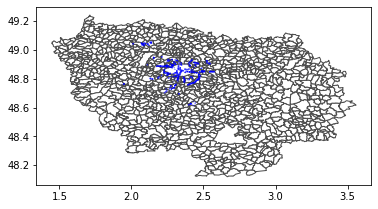

In [136]:
fig, ax = plt.subplots()
communes_idf.plot(ax=ax, color='white', edgecolor='0.3')
compteurs.plot(ax=ax, color='blue')
plt.show()

In [140]:
compteurs2 = pd.read_json('D:/Données/ENSAE/2A/Python/comptage-velo-donnees-compteurs.json')

In [143]:
 compteurs2
#Pas lisible de la bonne manière

,datasetid,recordid,fields,geometry,record_timestamp
0,comptage-velo-donnees-compteurs,a60867327acd1993730d092c4bfe5d7bcb2c1611,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2020-11-06T08:00:15.819+01:00
1,comptage-velo-donnees-compteurs,27c208904219bc7c482fe30631c5562962673d43,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2020-11-06T08:00:15.819+01:00
2,comptage-velo-donnees-compteurs,2a75968d2e3627f43a1877058740111d30cbad07,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2020-11-06T08:00:15.819+01:00
3,comptage-velo-donnees-compteurs,1c3349316233d7eb1b11eef69b7bdad36d7414a2,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2020-11-06T08:00:15.819+01:00
4,comptage-velo-donnees-compteurs,13114b02937d45554cc7dbf86ab591e0a191773a,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.33338, 48....",2020-11-06T08:00:15.819+01:00
...,...,...,...,...,...
820191,comptage-velo-donnees-compteurs,69c5dec9592a7f35ae42c10ba1be870d8d914010,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.345648, 48...",2020-11-06T08:29:44.372+01:00
820192,comptage-velo-donnees-compteurs,1342b1affb23017a426a15fcf46eac01552c1088,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.345648, 48...",2020-11-06T08:29:44.372+01:00
820193,comptage-velo-donnees-compteurs,89b911a144638e304715e8eb1f24d3fc55774859,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.345648, 48...",2020-11-06T08:29:44.372+01:00
820194,comptage-velo-donnees-compteurs,f369092cd2478e5d465b64e2c7e0ac245e95e38d,{'url_photos_n1': 'https://www.eco-visio.net/P...,"{'type': 'Point', 'coordinates': [2.345648, 48...",2020-11-06T08:29:44.372+01:00


lien utile pour choisir la position de départ sur la carte  : https://python-visualization.github.io/folium/quickstart.html
il génère un oblget popu quand on clique à un endroit sur la carte

Pour les compteurs on a des données aussi : https://www.data.gouv.fr/fr/datasets/comptage-velo-historique-donnees-compteurs/